<a href="https://colab.research.google.com/github/Erica97/Winter-2022-Data-Science-Intern-Challenge/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

####a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [136]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Shopify/2019 Winter Data Science Intern Challenge Data Set.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Firstly validate the 30-day window, from earliest:", min(df['created_at'])[:10] + ' to latest: ' + max(df['created_at'])[:10] + '.\n')
inaccurate_AOV=df['order_amount'].sum()/len(df['order_id'])
print("The inaccurate AOV is simply calculated as dividing the sum of order_amount by the number of orders.\n\nThe result is therefore ${0:.2f}.".format(inaccurate_AOV))

Firstly validate the 30-day window, from earliest: 2017-03-01 to latest: 2017-03-30.

The inaccurate AOV is simply calculated as dividing the sum of order_amount by the number of orders.

The result is therefore $3145.13.


Secondly, inspect the distributions of order_amount by each type of payment_method.



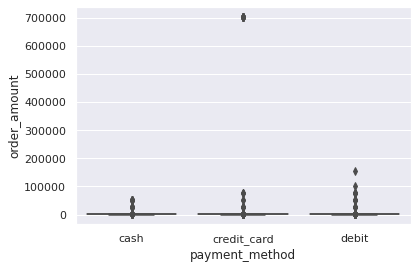

In [138]:
print("Secondly, inspect the distributions of order_amount by each type of payment_method.\n")
sns.set(style="darkgrid")
ax = sns.boxplot(x=df["payment_method"], y=df["order_amount"])

This problem was caused due to not removing outliers in the dataset. Next, I will use the IQR method in Statistics to find outliers in each payment category.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


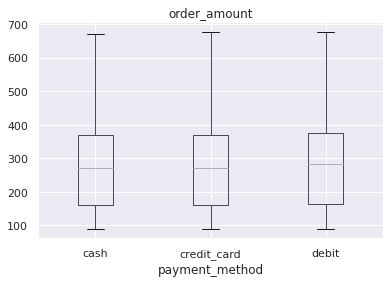

In [139]:
IQR = df['order_amount'].quantile(.75) - df['order_amount'].quantile(.25)
filtered_df = df[(df['order_amount'] < df['order_amount'].quantile(.5) + IQR*1.75) & (df['order_amount'] > df['order_amount'].quantile(.5) - IQR*1.75)]
filtered_df.boxplot(column='order_amount', by='payment_method')
plt.suptitle('') 
plt.show()

Now I want to know the min and max order_amount for each type of payment method after removing outliers.

In [140]:
filtered_df.groupby('payment_method').describe()['order_amount']

,count,mean,std,min,25%,50%,75%,max
payment_method,,,,,,,,
cash,1541.0,286.104478,137.571738,90.0,160.0,272.0,368.0,670.0
credit_card,1655.0,286.523263,137.065124,90.0,161.0,272.0,368.0,676.0
debit,1597.0,291.459612,136.473828,90.0,164.0,282.0,374.0,676.0


Since the ranges for each type of payment methods are close, I will keep all orders with order_amount between 90 and 676.

In [141]:
filtered_df = filtered_df[filtered_df['order_amount'] >= 90]
filtered_df = filtered_df[filtered_df['order_amount'] <= 676]

To better evaluate AOV, I will use the filtered data in part b) and c).

####b) What metric would you report for this dataset? c) What is its value?

**Alternative metric 1**: Remove the outliers we found in part a) and perform the same calculation.

This is the **mean revenue per order.**

In [142]:
df_1 = filtered_df.copy()
AOV_1=df_1['order_amount'].sum()/len(df_1['order_id'])
print('alternaive AOV1: ${0:.2f}'.format(AOV_1))

alternaive AOV1: $288.03


**Alternative metric 2**: Suppose I want to find the **average unit price** for sneakers.

In [143]:
AOV_2=df_1['order_amount'].sum()/df_1['total_items'].sum()
print('alternaive AOV2: ${0:.2f}'.format(AOV_2))

alternaive AOV2: $149.64


**Alternative 3**: Use median instead of mean, because the variance in order_amount is high. This is the **median revenue per order.**

In [144]:
df_1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000
mean,2496.841435,49.799082,850.261840,288.033382,1.924890
std,1443.869341,29.119506,86.878953,137.024626,0.893185
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1243.000000,24.000000,776.000000,162.000000,1.000000
50%,2497.000000,50.000000,851.000000,276.000000,2.000000
75%,3748.000000,74.000000,926.000000,374.000000,2.000000
max,5000.000000,100.000000,999.000000,676.000000,5.000000


alternative AOV3: $276.00